Some imports...

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 3d plots

In [50]:
def time_vs_logsize_vs_loglat(csv_filename, title):
    #function to plot a 3d curve of time vs size vs loglatency
    data = pd.read_csv(csv_filename, header=0)
    data['logSize'] = np.log2(data['Size'])
    data['logLatency'] = np.log2(data['Latency'])
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(data['Processes'], data['logSize'], data['logLatency'], cmap='viridis')
    ax.set_xlabel('Processes')
    ax.set_ylabel(r'$\log_2$(Size [bytes])')
    ax.set_zlabel(r'$\log_2$(Latency $\mu$s )', labelpad=-30)
    ax.set_xlim(0, data['Processes'].max())
    ax.set_ylim(0, data[r'logSize'].max())
    ax.set_zlim(data['logLatency'].min(), data['logLatency'].max())
    ax.set_title(title)
    plt.show()


## Bcast

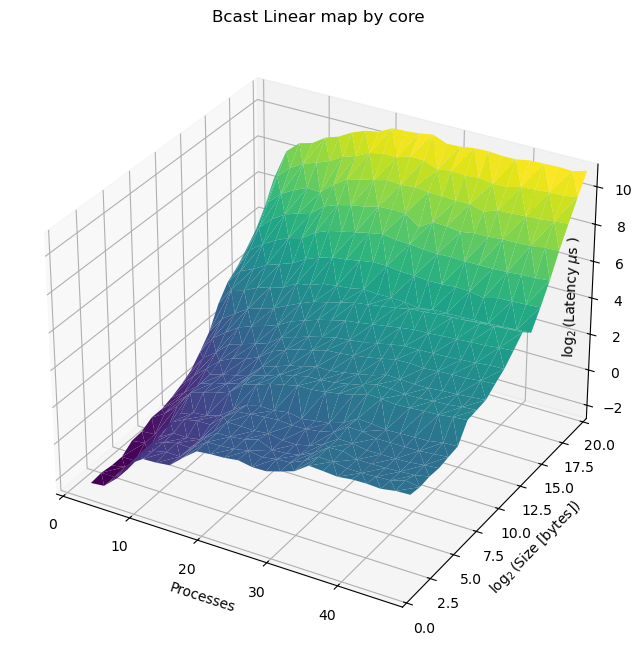

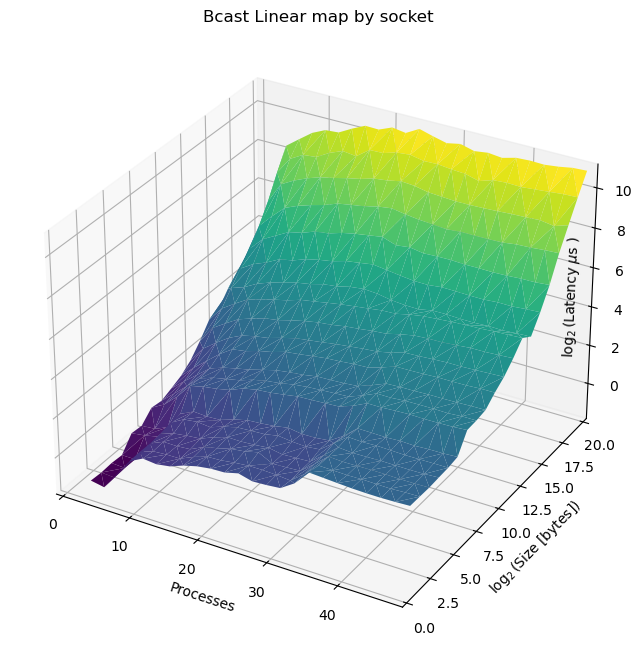

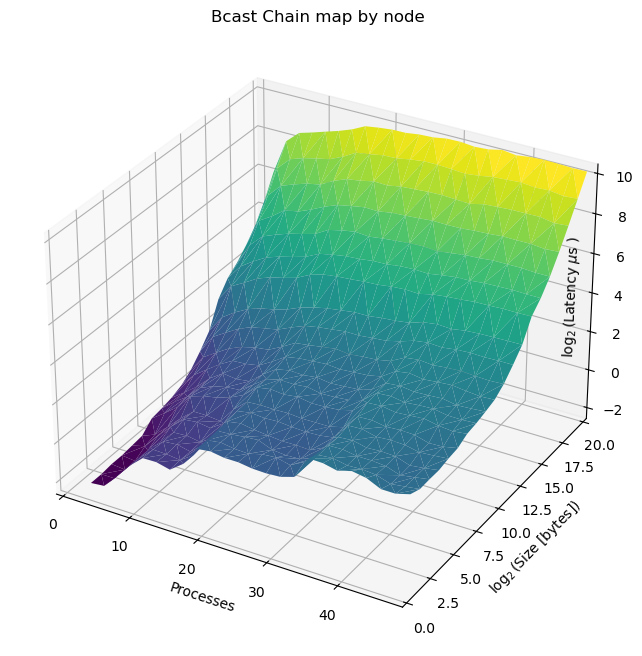

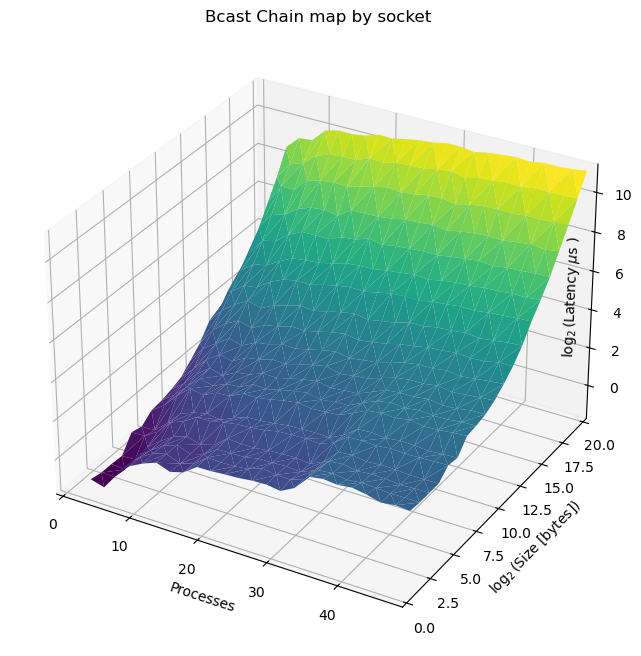

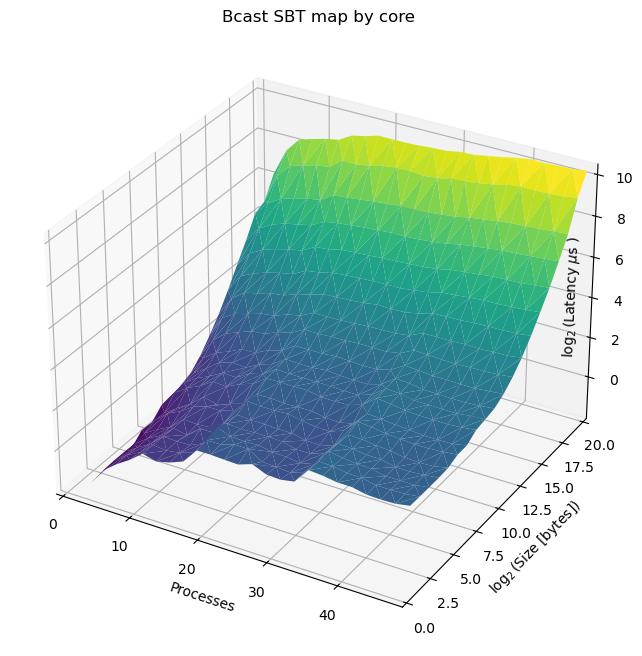

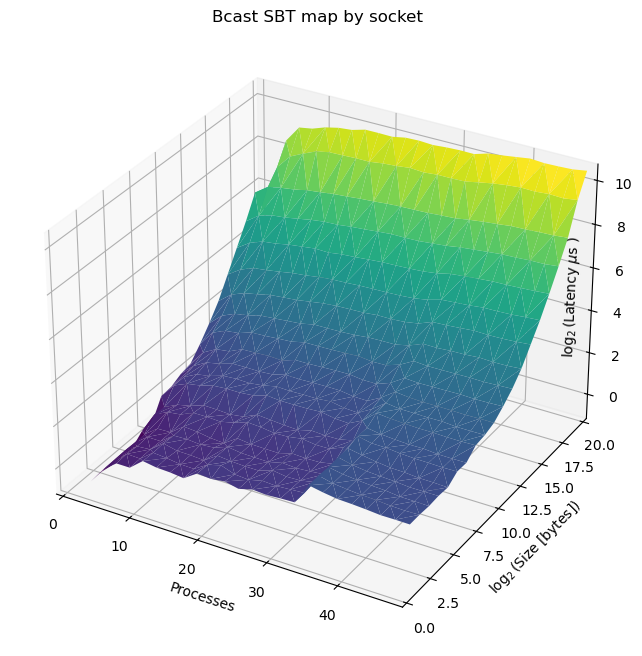

In [51]:
time_vs_logsize_vs_loglat('bcast/bcast1_core_thin.csv', 'Bcast Linear map by core')
time_vs_logsize_vs_loglat('bcast/bcast1_socket_thin.csv', 'Bcast Linear map by socket')
time_vs_logsize_vs_loglat('bcast/bcast2_core_thin.csv', 'Bcast Chain map by node')
time_vs_logsize_vs_loglat('bcast/bcast2_socket_thin.csv', 'Bcast Chain map by socket')
time_vs_logsize_vs_loglat('bcast/bcast4_core_thin.csv', 'Bcast SBT map by core')
time_vs_logsize_vs_loglat('bcast/bcast4_socket_thin.csv', 'Bcast SBT map by socket')

## Reduce

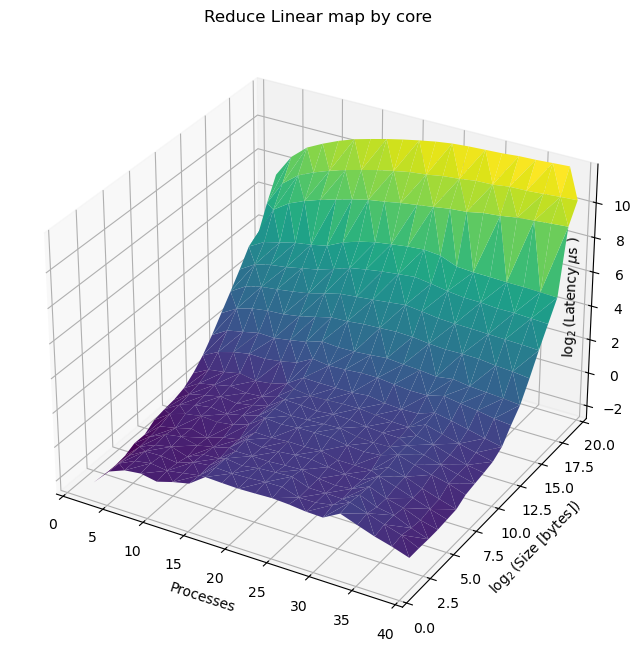

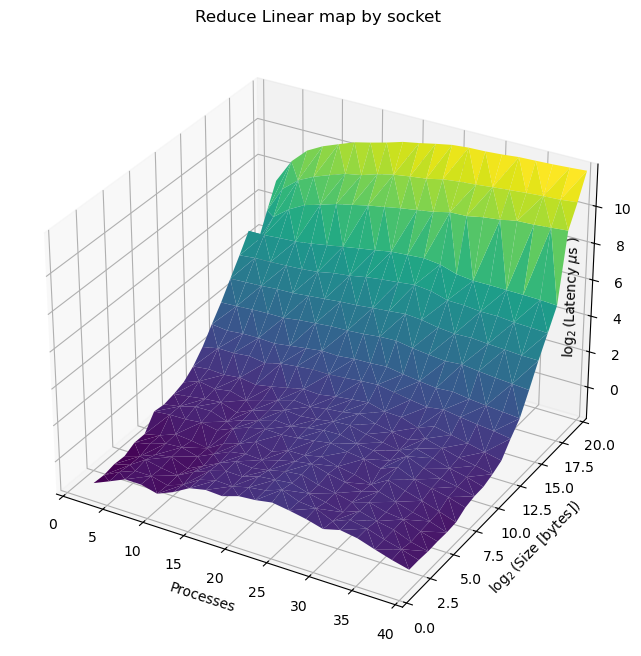

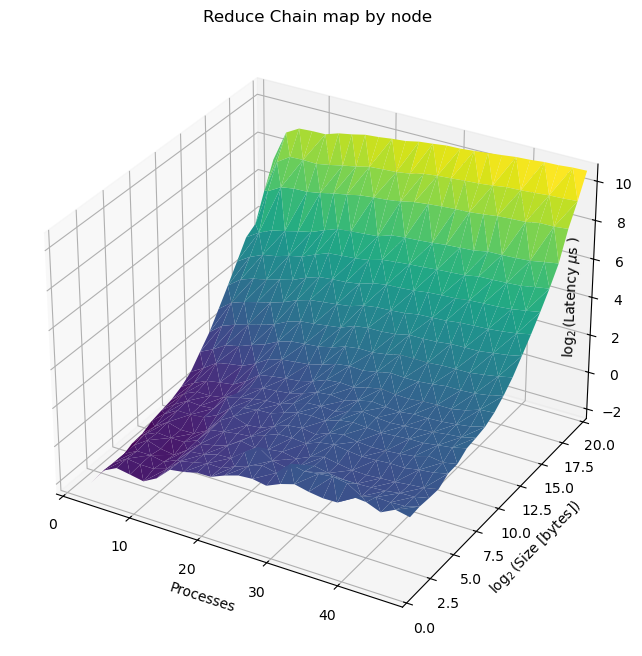

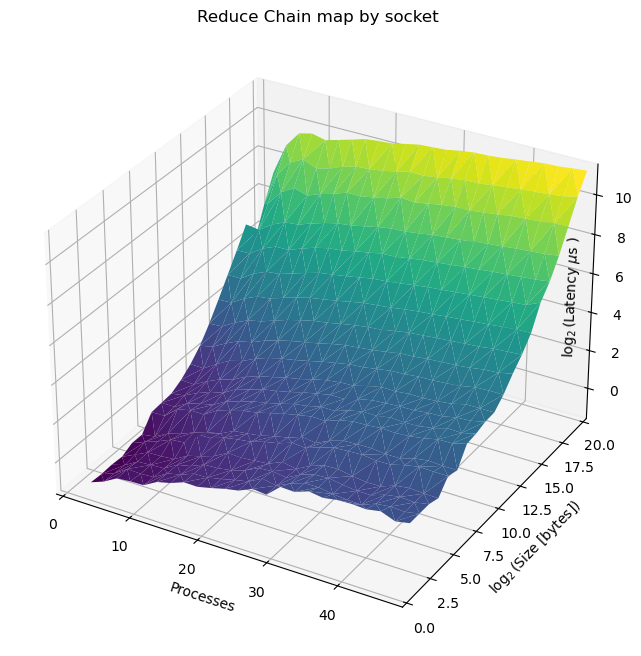

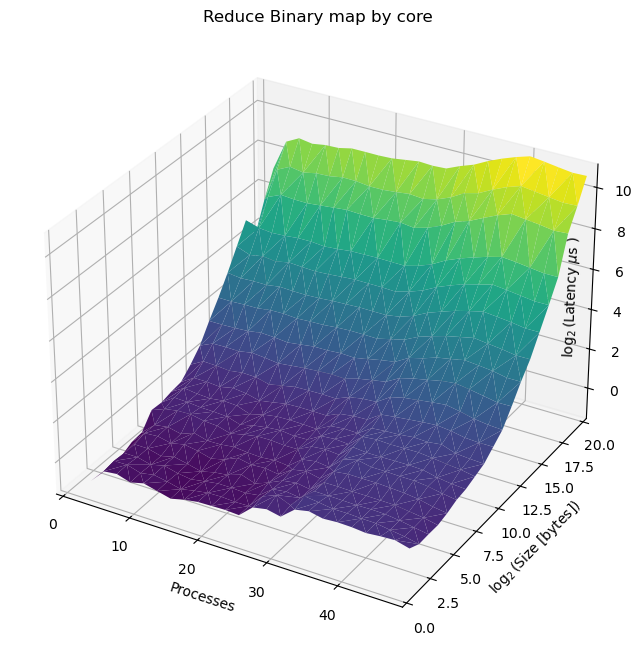

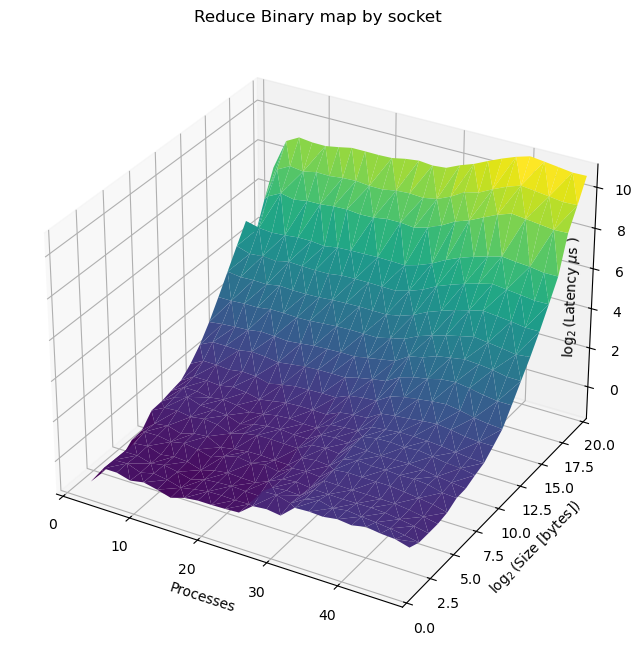

In [52]:
time_vs_logsize_vs_loglat('reduce/reduce1_core_thin.csv', 'Reduce Linear map by core')
time_vs_logsize_vs_loglat('reduce/reduce1_socket_thin.csv', 'Reduce Linear map by socket')
time_vs_logsize_vs_loglat('reduce/reduce2_core_thin.csv', 'Reduce Chain map by node')
time_vs_logsize_vs_loglat('reduce/reduce2_socket_thin.csv', 'Reduce Chain map by socket')
time_vs_logsize_vs_loglat('reduce/reduce4_core_thin.csv', 'Reduce Binary map by core')
time_vs_logsize_vs_loglat('reduce/reduce4_socket_thin.csv', 'Reduce Binary map by socket')

# 2d plots

In [53]:
def latency_vs_processes_fixedS(op, size):
    #function to plot the latency vs processes for a fixed size
    #Get the data of the operation
    d_1_c = pd.read_csv(f'{op}/{op}1_core_thin.csv', header=0)
    d_1_s = pd.read_csv(f'{op}/{op}1_socket_thin.csv', header=0)
    d_2_c = pd.read_csv(f'{op}/{op}2_core_thin.csv', header=0)
    d_2_s = pd.read_csv(f'{op}/{op}2_socket_thin.csv', header=0)
    d_4_c = pd.read_csv(f'{op}/{op}4_core_thin.csv', header=0)
    d_4_s = pd.read_csv(f'{op}/{op}4_socket_thin.csv', header=0)

    #Fix the Size
    d_1_c_fixedS = d_1_c[d_1_c['Size'] == size].drop(columns=['Size'])
    d_1_s_fixedS = d_1_s[d_1_s['Size'] == size].drop(columns=['Size'])
    d_2_c_fixedS = d_2_c[d_2_c['Size'] == size].drop(columns=['Size'])
    d_2_s_fixedS = d_2_s[d_2_s['Size'] == size].drop(columns=['Size'])
    d_4_c_fixedS = d_4_c[d_4_c['Size'] == size].drop(columns=['Size'])
    d_4_s_fixedS = d_4_s[d_4_s['Size'] == size].drop(columns=['Size'])

    # Plot the 6 lines on a single graph, make lìthicker lines
    fig, ax = plt.subplots()
    ax.plot(d_1_c_fixedS['Processes'], d_1_c_fixedS['Latency'], label='Linear map by core', linewidth=3, color='red')
    ax.plot(d_1_s_fixedS['Processes'], d_1_s_fixedS['Latency'], label='Linear map by socket', linewidth=3, color='red', linestyle='dashed')
    ax.plot(d_2_c_fixedS['Processes'], d_2_c_fixedS['Latency'], label='Chain map by core', linewidth=3, color='blue' )
    ax.plot(d_2_s_fixedS['Processes'], d_2_s_fixedS['Latency'], label='Chain map by socket', linewidth=3, color='blue', linestyle='dashed')
    ax.plot(d_4_c_fixedS['Processes'], d_4_c_fixedS['Latency'], label='Binary map by core', linewidth=3, color='green')
    ax.plot(d_4_s_fixedS['Processes'], d_4_s_fixedS['Latency'], label='Binary map by socket', linewidth=3, color='green', linestyle='dashed')
    ax.set_xlabel('Processes')
    ax.set_ylabel(r'Latency ($\mu$s)')
    ax.set_title(f'{op} operation with size {size} bytes')
    ax.grid(True)
    ax.legend()
    #save the plot
    plt.savefig(f'plots/{op}_fixedSize{size}.png')
    ax.legend()


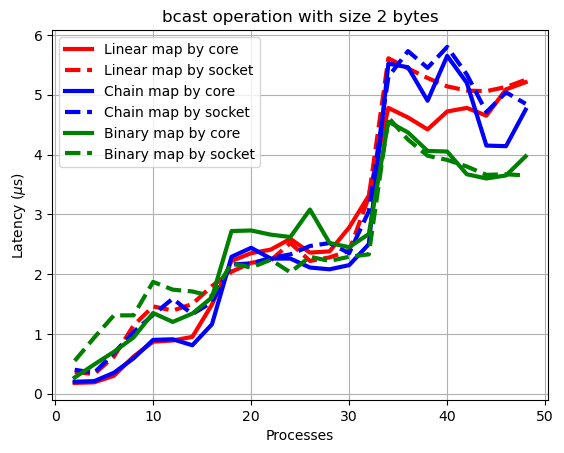

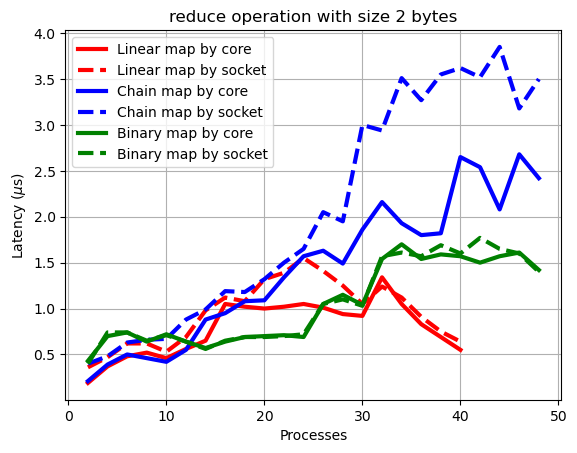

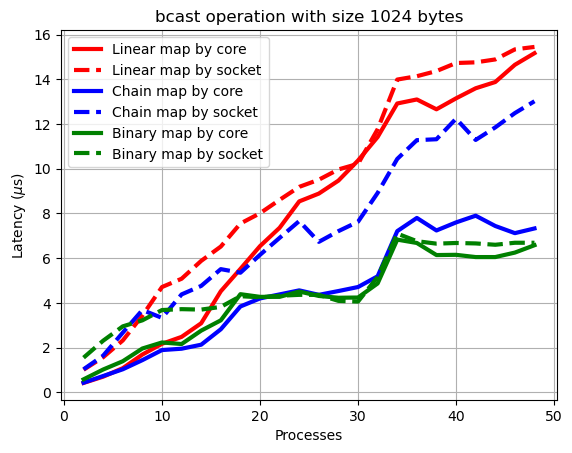

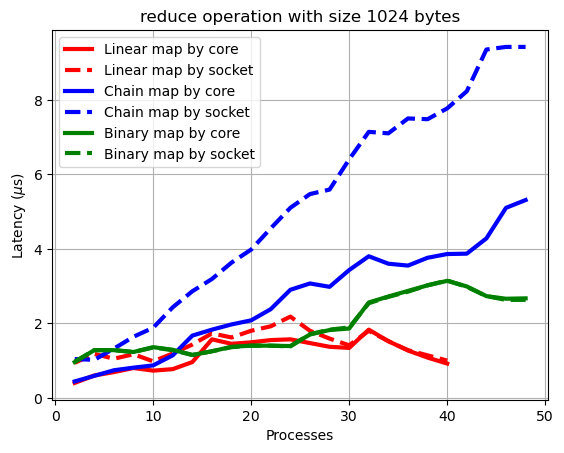

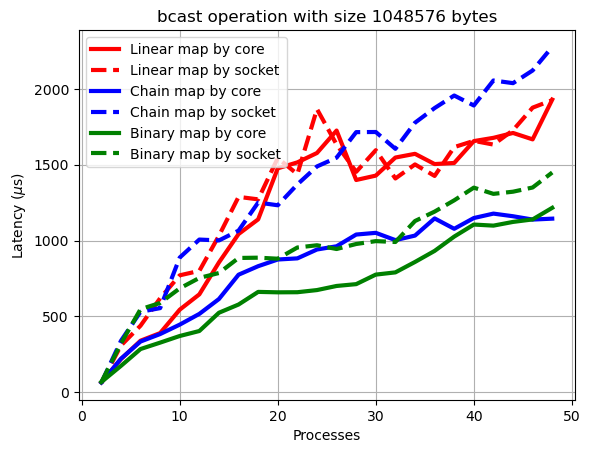

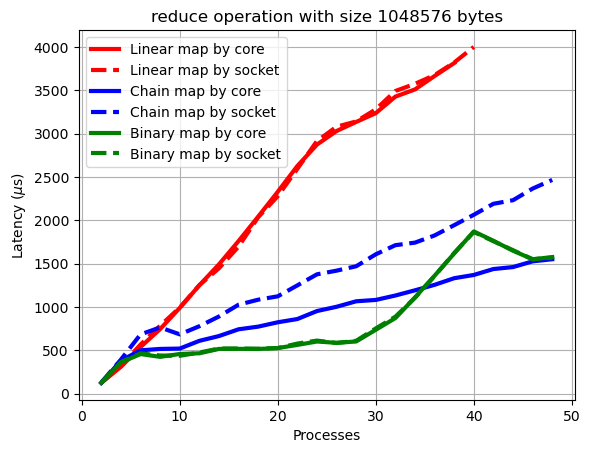

In [54]:
latency_vs_processes_fixedS('bcast', 2)
latency_vs_processes_fixedS('reduce', 2)
latency_vs_processes_fixedS('bcast', 1024)
latency_vs_processes_fixedS('reduce', 1024)
latency_vs_processes_fixedS('bcast', 1048576)
latency_vs_processes_fixedS('reduce', 1048576)

In [55]:
def latency_vs_size_fixedP(op, processes):
    #function to plot the latency vs processes for a fixed processes
    #Get the data of the operation
    d_1_c = pd.read_csv(f'{op}/{op}1_core_thin.csv', header=0)
    d_1_s = pd.read_csv(f'{op}/{op}1_socket_thin.csv', header=0)
    d_2_c = pd.read_csv(f'{op}/{op}2_core_thin.csv', header=0)
    d_2_s = pd.read_csv(f'{op}/{op}2_socket_thin.csv', header=0)
    d_4_c = pd.read_csv(f'{op}/{op}4_core_thin.csv', header=0)
    d_4_s = pd.read_csv(f'{op}/{op}4_socket_thin.csv', header=0)


    #Fix the processes
    d_1_c_fixedP = d_1_c[d_1_c['Processes'] == processes]
    d_1_s_fixedP = d_1_s[d_1_s['Processes'] == processes]
    d_2_c_fixedP = d_2_c[d_2_c['Processes'] == processes]
    d_2_s_fixedP = d_2_s[d_2_s['Processes'] == processes]
    d_4_c_fixedP = d_4_c[d_4_c['Processes'] == processes]
    d_4_s_fixedP = d_4_s[d_4_s['Processes'] == processes]


    # Plot the 6 lines on a single graph, make lìthicker lines
    fig, ax = plt.subplots()
    ax.plot(d_1_c_fixedP['Size'], d_1_c_fixedP['Latency'], label='Linear map by core', linewidth=3, color='red')
    ax.plot(d_1_s_fixedP['Size'], d_1_s_fixedP['Latency'], label='Linear map by socket', linewidth=3, color='red', linestyle='dashed')
    ax.plot(d_2_c_fixedP['Size'], d_2_c_fixedP['Latency'], label='Chain map by core', linewidth=3, color='blue' )
    ax.plot(d_2_s_fixedP['Size'], d_2_s_fixedP['Latency'], label='Chain map by socket', linewidth=3, color='blue', linestyle='dashed')
    ax.plot(d_4_c_fixedP['Size'], d_4_c_fixedP['Latency'], label='Binary map by core', linewidth=3, color='green')
    ax.plot(d_4_s_fixedP['Size'], d_4_s_fixedP['Latency'], label='Binary map by socket', linewidth=3, color='green', linestyle='dashed')
    ax.set_xlabel('Size')
    ax.set_ylabel(r'Latency ($\mu$s)')
    ax.set_title(f'{op} operation with {processes} processes')
    ax.grid(True)
    ax.legend()
    plt.savefig(f'plots/{op}_fixedprocesses{processes}.png')
    ax.legend()
    plt.show()


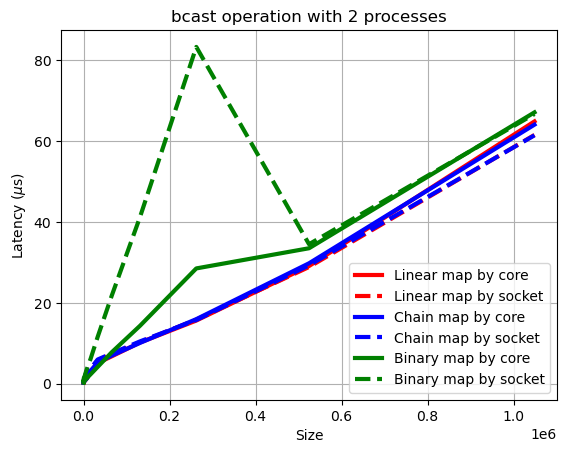

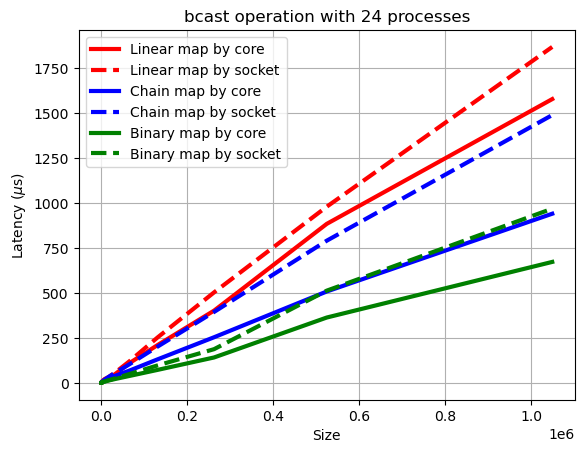

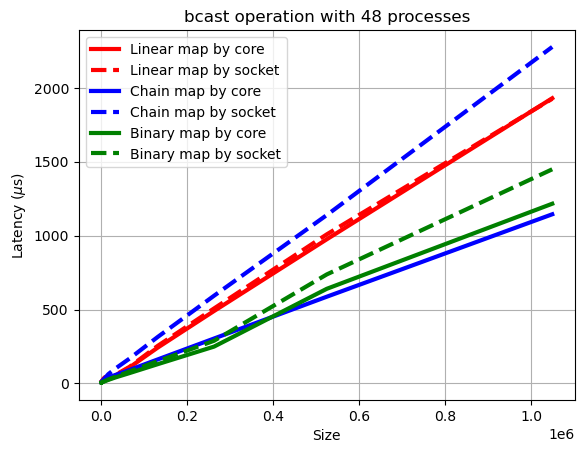

In [56]:
latency_vs_size_fixedP('bcast', 2)
latency_vs_size_fixedP('bcast', 24)
latency_vs_size_fixedP('bcast', 48)

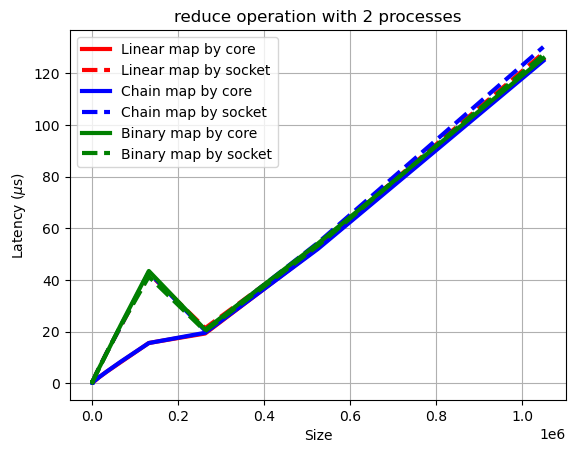

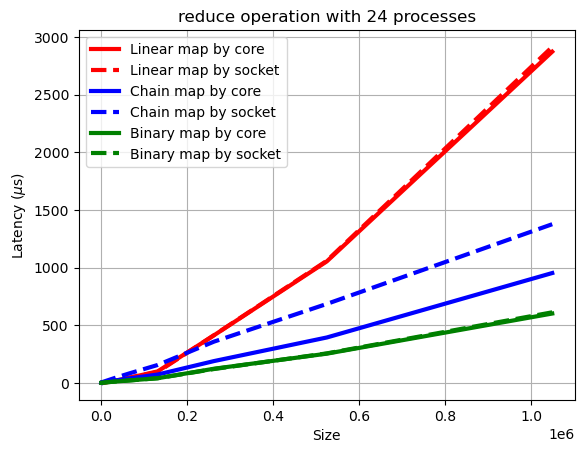

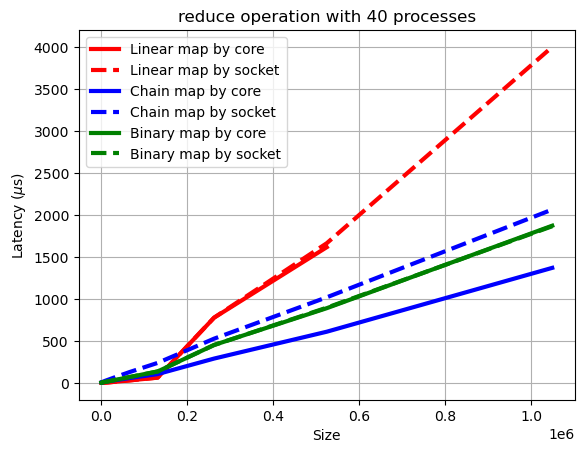

In [58]:
latency_vs_size_fixedP('reduce', 2)
latency_vs_size_fixedP('reduce', 24)
latency_vs_size_fixedP('reduce', 40)